1. 부산 기온 데이터 수집

2. 부산에서 가장 더웠던 날은? 검색

3. 매년 크리스마스의 최고 기온과 최저 기온 추이:plot

4. 월별 기온 데이터:boxplot

## 데이터 수집

In [1]:
# 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./data/ta_20220921111947.csv', header=6) 
df.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,1907-10-01,159,19.1,13.8,24.0
1,1907-10-02,159,17.1,13.7,20.8
2,1907-10-03,159,19.1,14.3,25.1
3,1907-10-04,159,18.3,12.9,23.4
4,1907-10-05,159,19.2,16.4,20.2


In [3]:
df.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,1907-10-01,159,19.1,13.8,24.0
1,1907-10-02,159,17.1,13.7,20.8
2,1907-10-03,159,19.1,14.3,25.1
3,1907-10-04,159,18.3,12.9,23.4
4,1907-10-05,159,19.2,16.4,20.2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41994 entries, 0 to 41993
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   날짜       41994 non-null  object 
 1   지점       41994 non-null  int64  
 2   평균기온(℃)  41994 non-null  float64
 3   최저기온(℃)  41992 non-null  float64
 4   최고기온(℃)  41992 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.6+ MB


In [6]:
df.describe()

,지점,평균기온(℃),최저기온(℃),최고기온(℃)
count,41994.0,41994.000000,41992.000000,41992.000000
mean,159.0,14.158823,10.806975,18.435495
std,0.0,8.335183,8.866287,8.114008
min,159.0,-11.300000,-14.000000,-8.200000
25%,159.0,7.400000,3.600000,12.000000
50%,159.0,15.100000,11.600000,19.500000
75%,159.0,20.900000,18.200000,24.900000
max,159.0,31.700000,28.300000,37.300000


In [7]:
df.isnull().sum()

날짜         0
지점         0
평균기온(℃)    0
최저기온(℃)    2
최고기온(℃)    2
dtype: int64

## 부산에서 가장 더웠던 날

In [8]:
df[df['평균기온(℃)'].isnull()]

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)


In [9]:
df[df['최저기온(℃)'].isnull()]

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
21691,1967-02-19,159,2.7,NaN,NaN
24122,1973-10-16,159,15.9,NaN,NaN


In [10]:
df[df['최고기온(℃)'].isnull()]

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
21691,1967-02-19,159,2.7,NaN,NaN
24122,1973-10-16,159,15.9,NaN,NaN


In [11]:
df.columns

Index(['날짜', '지점', '평균기온(℃)', '최저기온(℃)', '최고기온(℃)'], dtype='object')

In [12]:
df.rename(columns={df.columns[2]:'평균기온',
                   df.columns[3]:'최저기온',
                   df.columns[4]:'최고기온'}, inplace=True)

In [13]:
df.sort_values(by=['최고기온'],ascending=False)

,날짜,지점,평균기온,최저기온,최고기온
39765,2016-08-14,159,31.7,28.3,37.3
27701,1983-08-04,159,30.8,26.5,36.7
39766,2016-08-15,159,29.4,25.3,36.6
40486,2018-08-05,159,31.3,28.1,36.4
40122,2017-08-06,159,31.7,27.6,36.2
...,...,...,...,...,...
2662,1915-01-14,159,-8.9,-12.7,-5.8
9249,1933-01-26,159,-8.5,-9.7,-6.2
2661,1915-01-13,159,-11.3,-14.0,-8.2
21691,1967-02-19,159,2.7,NaN,NaN


In [14]:
df[['날짜','최고기온']]

,날짜,최고기온
0,1907-10-01,24.0
1,1907-10-02,20.8
2,1907-10-03,25.1
3,1907-10-04,23.4
4,1907-10-05,20.2
...,...,...
41989,2022-09-16,29.2
41990,2022-09-17,30.4
41991,2022-09-18,31.0
41992,2022-09-19,28.8


In [15]:
df[df['최고기온']==df['최고기온'].max()]

,날짜,지점,평균기온,최저기온,최고기온
39765,2016-08-14,159,31.7,28.3,37.3


In [16]:
df.loc[39765,'날짜']

'2016-08-14'

In [18]:
# 부산에서 가장 더웠던 날은?
df_date=df.loc[39765,'날짜']
df_deg=df.loc[39765,'최고기온']

print("부산에서 가장 더웠던 날은? {0} : {1}".format(df_date,df_deg) )

부산에서 가장 더웠던 날은? 2016-08-14 : 37.3


In [19]:
Xmas_df = df[df['날짜'].str.contains('12-25')]

df['날짜'].str.contains('12-25')

0        False
1        False
2        False
3        False
4        False
         ...  
41989    False
41990    False
41991    False
41992    False
41993    False
Name: 날짜, Length: 41994, dtype: bool

In [20]:
Xmas_df.head()

,날짜,지점,평균기온,최저기온,최고기온
85,1907-12-25,159,9.1,5.3,13.9
451,1908-12-25,159,3.8,-0.6,9.1
816,1909-12-25,159,-3.9,-6.6,-0.6
1181,1910-12-25,159,2.7,-0.7,6.0
1546,1911-12-25,159,4.9,3.0,7.7


In [31]:
Xmas_df = Xmas_df[['날짜', '평균기온']]

In [22]:
Xmas_df.head()

,날짜,평균기온
85,1907-12-25,9.1
451,1908-12-25,3.8
816,1909-12-25,-3.9
1181,1910-12-25,2.7
1546,1911-12-25,4.9


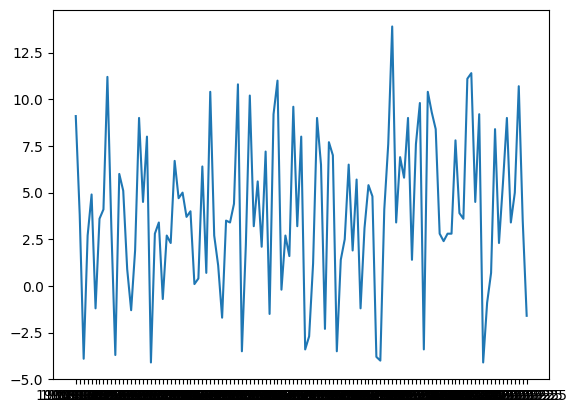

In [32]:
# import matplotlib.pyplot as plt

# plt.plot(Xmas_df['날짜'],Xmas_df['평균기온'])

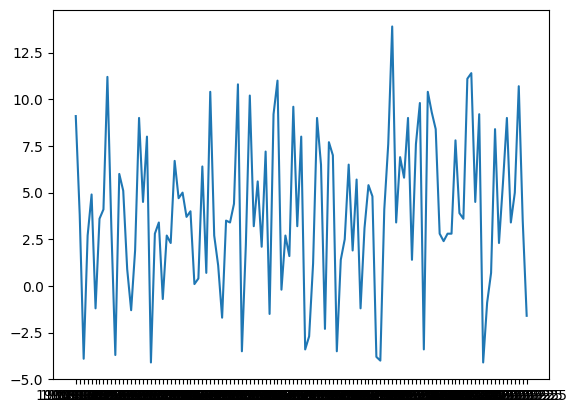

In [35]:
#Xmas_df = df[df['날짜'].str.contains('12-25')]
#Xmas_df = Xmas_df[['날짜', '평균기온']]
#plt.plot(Xmas_df['날짜'],Xmas_df['평균기온'])

## 크리스마스 추이

In [36]:
#라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 로딩
df = pd.read_csv('./data/ta_20220921111947.csv', header=6) 
df.head()

# 데이터 전처리 (컬럼명 수정)
df.rename(columns={df.columns[2]:'평균기온', 
                   df.columns[3]:'최저기온', 
                   df.columns[4]:'최고기온'}, inplace=True)
# 결측 데이터 삭제
df.dropna(inplace=True)

In [37]:
df['날짜'] = df['날짜'].astype('datetime64')

In [38]:
df['년']= df['날짜'].dt.year
df['월']= df['날짜'].dt.month
df['일']= df['날짜'].dt.day

In [39]:
# 크리스마스의 최고기온 최저기온 데이터만 추출
Xmas_df = df[(df['월'] == 12) & (df['일'] == 25)]
Xmas_df.head()

,날짜,지점,평균기온,최저기온,최고기온,년,월,일
85,1907-12-25,159,9.1,5.3,13.9,1907,12,25
451,1908-12-25,159,3.8,-0.6,9.1,1908,12,25
816,1909-12-25,159,-3.9,-6.6,-0.6,1909,12,25
1181,1910-12-25,159,2.7,-0.7,6.0,1910,12,25
1546,1911-12-25,159,4.9,3.0,7.7,1911,12,25


In [40]:
# 필요한 컬럼만 추출
Xmas_df = Xmas_df[['년', '최고기온', '최저기온']]
Xmas_df.head()

,년,최고기온,최저기온
85,1907,13.9,5.3
451,1908,9.1,-0.6
816,1909,-0.6,-6.6
1181,1910,6.0,-0.7
1546,1911,7.7,3.0


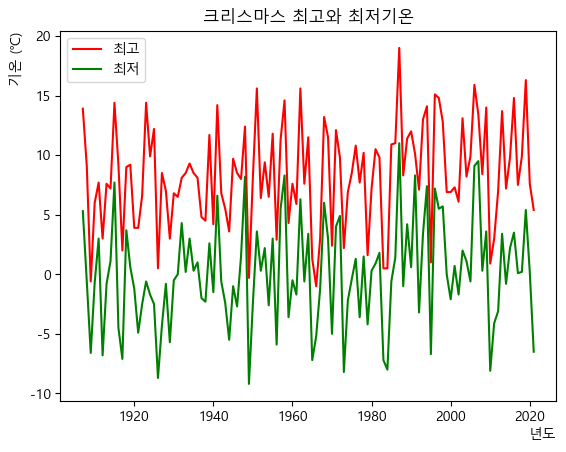

In [44]:
# 크리스마스 데이터 그래프 그리기
plt.title('Xmas Seoul Temperature')
plt.rc('font',family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus']=False
plt.title('크리스마스 최고와 최저기온')
plt.plot(Xmas_df['년'],Xmas_df['최고기온'], color='r', label='최고' )
plt.plot(Xmas_df['년'],Xmas_df['최저기온'], color='green', label='최저' )
plt.xlabel('년도', loc='right')
plt.ylabel('기온 (℃)', loc='top')
plt.legend()
plt.show()

## 월별 기온 데이터

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('./data/ta_20220921111947.csv',header=6)
df.rename(columns={
    df.columns[2]: '평균기온',
    df.columns[3]: '최저기온',
    df.columns[4]: '최고기온'
},inplace=True)

# 결측 데이터 삭제
df.dropna(inplace=True)
# 날짜 데이터 Str => date 형으로 변환
df['날짜'] = df['날짜'].astype('datetime64')

In [47]:
df['년'] = df['날짜'].dt.year
df['월'] = df['날짜'].dt.month
df['일'] = df['날짜'].dt.day

In [48]:
df.head()

,날짜,지점,평균기온,최저기온,최고기온,년,월,일
0,1907-10-01,159,19.1,13.8,24.0,1907,10,1
1,1907-10-02,159,17.1,13.7,20.8,1907,10,2
2,1907-10-03,159,19.1,14.3,25.1,1907,10,3
3,1907-10-04,159,18.3,12.9,23.4,1907,10,4
4,1907-10-05,159,19.2,16.4,20.2,1907,10,5


In [49]:
df.loc[df['월'] == 1,'평균기온']

92       2.1
93      -1.9
94      -0.8
95       0.1
96       1.0
        ... 
41757    6.3
41758    4.7
41759    3.3
41760    3.2
41761    3.6
Name: 평균기온, Length: 3565, dtype: float64

In [50]:
df.loc[df['월'] == 2,'평균기온']

123      5.8
124      3.4
125     -1.9
126     -0.8
127     -2.9
        ... 
41785    1.6
41786    5.0
41787    7.7
41788    6.7
41789    9.8
Name: 평균기온, Length: 3248, dtype: float64

In [51]:
avg_month = []

for i in range(1,13):
    # print(i)
    avg_month.append(df.loc[df['월'] == i,'평균기온'])

In [52]:
avg_month[0]

92       2.1
93      -1.9
94      -0.8
95       0.1
96       1.0
        ... 
41757    6.3
41758    4.7
41759    3.3
41760    3.2
41761    3.6
Name: 평균기온, Length: 3565, dtype: float64

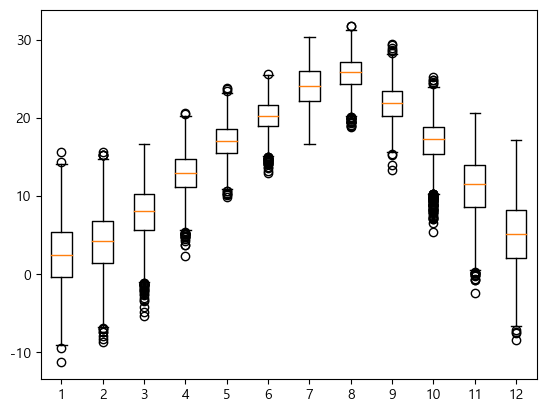

In [53]:
plt.boxplot(avg_month)
plt.show()